Based on: https://www.tensorflow.org/text/tutorials/classify_text_with_bert
Completed tutorial to get familiar with BERT

In [ ]:
#Data Visualization
import pandas as pd

#load data
resume = pd.read_csv("/content/UpdatedResumeDataSet.csv")

#view all of the categories
len(resume.iloc[:, 0].unique())
#25 categories
resume.iloc[:, 0].unique()
#note that all of the categories are good, there doesnt need for there to be any
#more data marshalling for the categories
#this is why I choose this data set


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
#view head
resume.head()
#note all the crappy characters in the resume to be cleaned

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


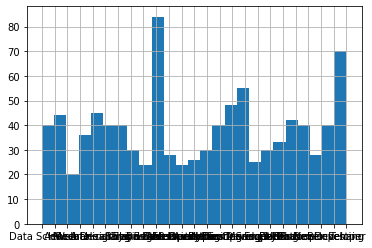

In [ ]:
#view 
resume.Category.hist(bins=25)
#looks like a pretty even distribution of categories, the minimum number of resumes for 1 particular categories is 20

In [ ]:
#find number of resumes for training versus validation set
len(resume)
#962 resumes

962*.2
#193 resumes for 20% validation
962-193
#769 entries for training

769

In [ ]:
#label encoding categories
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
resume["Category"] = resume["Category"].astype('category')
resume.dtypes
d = dict(enumerate(resume.Category))
print (d)

{0: 'Data Science', 1: 'Data Science', 2: 'Data Science', 3: 'Data Science', 4: 'Data Science', 5: 'Data Science', 6: 'Data Science', 7: 'Data Science', 8: 'Data Science', 9: 'Data Science', 10: 'Data Science', 11: 'Data Science', 12: 'Data Science', 13: 'Data Science', 14: 'Data Science', 15: 'Data Science', 16: 'Data Science', 17: 'Data Science', 18: 'Data Science', 19: 'Data Science', 20: 'Data Science', 21: 'Data Science', 22: 'Data Science', 23: 'Data Science', 24: 'Data Science', 25: 'Data Science', 26: 'Data Science', 27: 'Data Science', 28: 'Data Science', 29: 'Data Science', 30: 'Data Science', 31: 'Data Science', 32: 'Data Science', 33: 'Data Science', 34: 'Data Science', 35: 'Data Science', 36: 'Data Science', 37: 'Data Science', 38: 'Data Science', 39: 'Data Science', 40: 'HR', 41: 'HR', 42: 'HR', 43: 'HR', 44: 'HR', 45: 'HR', 46: 'HR', 47: 'HR', 48: 'HR', 49: 'HR', 50: 'HR', 51: 'HR', 52: 'HR', 53: 'HR', 54: 'HR', 55: 'HR', 56: 'HR', 57: 'HR', 58: 'HR', 59: 'HR', 60: 'HR',

In [ ]:
resume["Category"] = resume["Category"].cat.codes
resume.head()

,Category,Resume
0,6,Skills * Programming Languages: Python (pandas...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...
2,6,"Areas of Interest Deep Learning, Control Syste..."
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
resume.iloc[:, 0].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int8)

In [ ]:
d = dict(enumerate(resume.Category))
print (d)

{0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 9: 6, 10: 6, 11: 6, 12: 6, 13: 6, 14: 6, 15: 6, 16: 6, 17: 6, 18: 6, 19: 6, 20: 6, 21: 6, 22: 6, 23: 6, 24: 6, 25: 6, 26: 6, 27: 6, 28: 6, 29: 6, 30: 6, 31: 6, 32: 6, 33: 6, 34: 6, 35: 6, 36: 6, 37: 6, 38: 6, 39: 6, 40: 12, 41: 12, 42: 12, 43: 12, 44: 12, 45: 12, 46: 12, 47: 12, 48: 12, 49: 12, 50: 12, 51: 12, 52: 12, 53: 12, 54: 12, 55: 12, 56: 12, 57: 12, 58: 12, 59: 12, 60: 12, 61: 12, 62: 12, 63: 12, 64: 12, 65: 12, 66: 12, 67: 12, 68: 12, 69: 12, 70: 12, 71: 12, 72: 12, 73: 12, 74: 12, 75: 12, 76: 12, 77: 12, 78: 12, 79: 12, 80: 12, 81: 12, 82: 12, 83: 12, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 1

In [ ]:
#data clean up
#remove special characters with regular expressions
#https://stackoverflow.com/questions/43358857/how-to-remove-special-characters-except-space-from-a-file-in-python
#https://stackoverflow.com/questions/25292838/applying-regex-to-a-pandas-dataframe
import re

#removes special chars
def clean_chars(clean):
    return re.sub(r"[^a-zA-Z0-9]+", ' ', clean)

# test = "Details \r\nMay 2013 to May 2017 B."
# final = [re.sub(r"[^a-zA-Z0-9]+", ' ', test)]
# print(final)
#['Details May 2013 to May 2017 B ']

#need to strip trailing white spaces
resume.Resume = resume.Resume.apply(lambda x: clean_chars(x).strip())
resume.Resume

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958    Willingness to accept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [ ]:
#data restrict length to 128 characters
import itertools

#https://stackoverflow.com/questions/22767509/python-get-the-x-first-words-in-a-string
# test = 'Computer Skills Proficient in MS office Word B'
# test = test.split(' ')
# test = test[:5]
# test
# #['Computer', 'Skills', 'Proficient', 'in', 'MS']
# test = ' '.join(test)
# test

resume.Resume = resume.Resume.apply(lambda x: ' '.join(x.split(' ')[:128]))
resume.Resume

0      Skills Programming Languages Python pandas
1                   Education Details May 2013 to
2                 Areas of Interest Deep Learning
3                        Skills R Python SAP HANA
4         Education Details MCA YMCAUST Faridabad
                          ...                    
957              Computer Skills Proficient in MS
958          Willingness to accept the challenges
959       PERSONAL SKILLS Quick learner Eagerness
960         COMPUTER SKILLS SOFTWARE KNOWLEDGE MS
961                       Skill Set OS Windows XP
Name: Resume, Length: 962, dtype: object

In [ ]:
#take look at fully clean data
resume.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas
1,Data Science,Education Details May 2013 to
2,Data Science,Areas of Interest Deep Learning
3,Data Science,Skills R Python SAP HANA
4,Data Science,Education Details MCA YMCAUST Faridabad


In [ ]:
# A dependency of the preprocessing for BERT inputs
#!pip install -q -U "tensorflow-text==2.8.*"

     |████████████████████████████████| 4.9 MB 4.8 MB/s 
     |████████████████████████████████| 497.9 MB 36 kB/s 
     |████████████████████████████████| 462 kB 58.2 MB/s 
     |████████████████████████████████| 1.4 MB 59.4 MB/s 
     |████████████████████████████████| 5.8 MB 59.5 MB/s 


In [ ]:
#!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 118 kB 61.6 MB/s 
     |████████████████████████████████| 352 kB 63.5 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 41.3 MB/s 
     |████████████████████████████████| 238 kB 61.5 MB/s 
     |████████████████████████████████| 1.3 MB 54.8 MB/s 


In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [ ]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

train_dir = os.path.join(dataset_dir, 'train')

# remove unused folders to make it easier to load the data
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

84140032/84125825 [==============================] - 3s 0us/step


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 3 classes.
Using 20000 files for training.
Found 25000 files belonging to 3 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [ ]:
 #CHECKIN 3
 print(train_ds)

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
 #CHECKIN 3
len(raw_train_ds)
#625

#from documentation 
#https://www.tensorflow.org/datasets/overview
raw_train_ds = raw_train_ds.take(1)  # Only take a single example

for example in raw_train_ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(example)


(<tf.Tensor: shape=(32,), dtype=string, numpy=
array([b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)',
       b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose persp

In [ ]:
 #CHECKIN 3
#looks like I need 2x tensors arrays of size 32, each with 1 array for text and a second array for encodings
#figuring out what b' means
for example in raw_train_ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(example[0])

tf.Tensor(
[b"Having seen most of Ringo Lam's films, I can say that this is his best film to date, and the most unusual. It's a ancient china period piece cranked full of kick-ass martial arts, where the location of an underground lair full of traps and dungeons plays as big a part as any of the characters. The action is fantastic, the story is tense and entertaining, and the set design is truely memorable. Sadly, Burning Paradise has not been made available on DVD and vhs is next-to-impossible to get your mitts on, even if you near the second biggest china-town in North America (like I do). If you can find it, don't pass it up."
 b'Caution: May contain spoilers...<br /><br />I\'ve seen this movie 3 times & I\'ve liked it every time. Upon seeing it again, I\'m always reminded of how good it is. An HBO TV movie- very well done like most of their movies are- this would\'ve gotten Oscars for it\'s performances had it been released for general distribution instead of made for TV.<br /><br 

In [ ]:
 #CHECKIN 3
for example in raw_train_ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(example[1])

tf.Tensor([0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0], shape=(32,), dtype=int32)


In [ ]:
 #CHECKIN 3
# looks like a tuple of 2 tf.tensors each of length 32
# https://stackoverflow.com/questions/34097281/convert-a-tensor-to-numpy-array-in-tensorflow
test
for example in raw_train_ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(example[0].numpy())
  test = example[0].numpy()



[b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.'
 b"I am shocked. Shocked and dismayed that the 428 of you IMDB users who voted before me have not given this film a rating of higher than 7. 7?!?? - that's a C!. If I could give FOBH a 20, I'd gladly do it. This film ranks high atop the pantheon of modern comedy, alongside Half Baked and Mallrats, as one of the most hilarious films of all time. If you know _anything_ about rap music - YOU MUST SEE THIS!! If you know nothing about rap music - learn something!, and then see this! Comparisons to 'Spinal Tap' fail to appreciate the inspired genius of this unique film. If you liked Bob Roberts, you'll love this. Watch it and vote it a 10!"
 b'What a lovely heart warming television movie. The story tells of a little five year old girl who has lost her daddy and finds it impossible to cope. Her mother is also very distressed ..only a miracle can alleviate thei

In [ ]:
 #CHECKIN 3
print(test[0])
#this is a bytes object
#https://www.programiz.com/python-programming/methods/built-in/bytes

b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.'


In [ ]:
 #CHECKIN 3
#recreating 
# 2 options
# 1 I could recreate the objects 1 at a time
# 2 I could just create the file directory structure and import
# I would need 1 folder for each category, with text files for each entry
# 2 seems easier to do than 1
# looking at dataset object, its designed to go from txt
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset
# TODO: need to create txt repositories https://stackoverflow.com/questions/31247198/python-pandas-write-content-of-dataframe-into-text-file 

In [ ]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(3):
    print(f'Review: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label} ({class_names[label]})')


Review: b'Every scene was put together perfectly.This movie had a wonderful cast and crew. I mean, how can you have a bad movie with Robert Downey Jr. in it,none have and ever will exist. He has the ability to brighten up any movie with his amazing talent.This movie was perfect! I saw this movie sitting all alone on a movie shelf in "Blockbuster" and like it was calling out to me,I couldn\'t resist picking it up and bringing it home with me. You can call me a sappy romantic, but this movie just touched my heart, not to mention made me laugh with pleasure at the same time. Even though it made me cry,I admit, at the end, the whole movie just brightened up my outlook on life thereafter.I suggested to my horror, action, and pure humor movie buff of a brother,who absolutely adored this movie. This is a movie with a good sense of feeling.It could make you laugh out loud, touch your heart, make you fall in love,and enjoy your life.Every time you purposefully walk past this movie, just be awar

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_type_ids', 'input_word_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.76262903  0.9928099  -0.1861187   0.3667383   0.15233696  0.65504414
  0.9681154  -0.9486272   0.00216167 -0.9877732   0.06842678 -0.9763059 ]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.28946355  0.34321314  0.3323151  ...  0.2130079   0.7102079
  -0.05771136]
 [-0.28742105  0.31981066 -0.2301857  ...  0.58455014 -0.21329743
   0.7269204 ]
 [-0.6615694   0.6887674  -0.8743296  ...  0.10877217 -0.26173162
   0.4785526 ]
 ...
 [-0.22561109 -0.28925592 -0.07064441 ...  0.4756602   0.83277166
   0.40025324]
 [-0.29824194 -0.2747312  -0.05450527 ...  0.48849782  1.0955361
   0.18163359]
 [-0.4437828   0.00930762  0.07223727 ...  0.17290081  1.1833241
   0.07897999]]


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.23925212]], shape=(1, 1), dtype=float32)


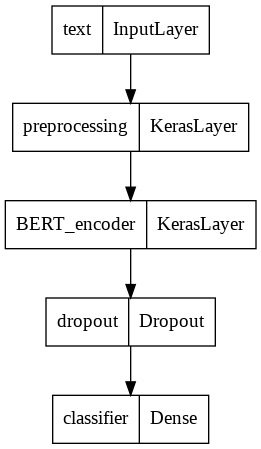

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
625/625 [==============================] - 933s 1s/step - loss: 0.5039 - binary_accuracy: 0.7339 - val_loss: 0.4049 - val_binary_accuracy: 0.8314
Epoch 2/5
625/625 [==============================] - 927s 1s/step - loss: 0.3332 - binary_accuracy: 0.8523 - val_loss: 0.3591 - val_binary_accuracy: 0.8496
Epoch 3/5
625/625 [==============================] - 924s 1s/step - loss: 0.2519 - binary_accuracy: 0.8939 - val_loss: 0.3875 - val_binary_accuracy: 0.8494
Epoch 4/5
625/625 [==============================] - 925s 1s/step - loss: 0.1883 - binary_accuracy: 0.9269 - val_loss: 0.4405 - val_binary_accuracy: 0.8546
Epoch 5/5
625/625 [==============================] - 924s 1s/step - loss: 0.1531 - binary_accuracy: 0.9431 - val_loss: 0.4660 - val_binary_accuracy: 0.8506


In [ ]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

782/782 [==============================] - 329s 420ms/step - loss: 0.4520 - binary_accuracy: 0.8569
Loss: 0.45197272300720215
Accuracy: 0.8569200038909912


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


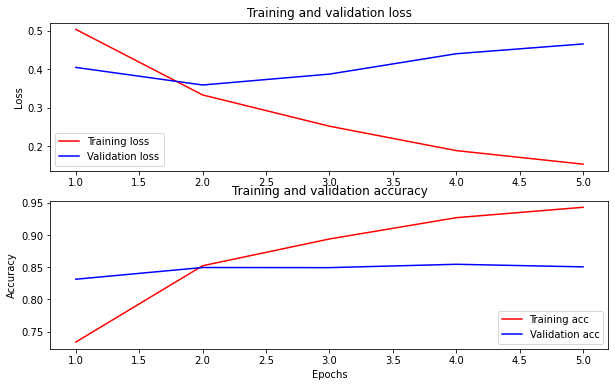

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
dataset_name = 'imdb'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

In [ ]:
reloaded_model = tf.saved_model.load(saved_model_path)

In [ ]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'this is such an amazing movie!',  # this is the same sentence tried earlier
    'The movie was great!',
    'The movie was meh.',
    'The movie was okish.',
    'The movie was terrible...'
]

reloaded_results = tf.sigmoid(reloaded_model(tf.constant(examples)))
original_results = tf.sigmoid(classifier_model(tf.constant(examples)))

print('Results from the saved model:')
print_my_examples(examples, reloaded_results)
print('Results from the model in memory:')
print_my_examples(examples, original_results)

Results from the saved model:
input: this is such an amazing movie! : score: 0.998903
input: The movie was great!           : score: 0.994243
input: The movie was meh.             : score: 0.972265
input: The movie was okish.           : score: 0.037899
input: The movie was terrible...      : score: 0.000607

Results from the model in memory:
input: this is such an amazing movie! : score: 0.998903
input: The movie was great!           : score: 0.994243
input: The movie was meh.             : score: 0.972265
input: The movie was okish.           : score: 0.037899
input: The movie was terrible...      : score: 0.000607



In [ ]:
serving_results = reloaded_model \
            .signatures['serving_default'](tf.constant(examples))

serving_results = tf.sigmoid(serving_results['classifier'])

print_my_examples(examples, serving_results)

input: this is such an amazing movie! : score: 0.998903
input: The movie was great!           : score: 0.994243
input: The movie was meh.             : score: 0.972265
input: The movie was okish.           : score: 0.037899
input: The movie was terrible...      : score: 0.000607

